<a href="https://colab.research.google.com/github/JacobyNevada/ds_belhard/blob/main/hw6/hw6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

# https://www.kaggle.com/datasets/joannanplkrk/its-raining-cats
df = pd.read_csv("cat_breeds.csv", sep=';')
print(df)

           Breed  Age_in_years  Age_in_months  Gender  Neutered_or_spayed  \
0         Angora          0.25              3  female               False   
1         Angora          0.33              4    male               False   
2         Angora          0.50              6    male               False   
3         Angora          0.50              6  female               False   
4         Angora          0.50              6    male               False   
...          ...           ...            ...     ...                 ...   
1066  Maine coon          0.17              2  female               False   
1067  Maine coon          0.17              2  female               False   
1068  Maine coon          0.17              2    male               False   
1069  Maine coon          0.17              2    male               False   
1070  Maine coon          0.17              2  female               False   

      Body_length  Weight Fur_colour_dominant Fur_pattern Eye_colour  \
0  

**Колонки**:

Breed - Порода кошки (категориальное значение)

Age_in_years - Возраст в годах (цифровое значение)

Age_in_months - Возраст в месяцах (цифровое значение)

Gender - Пол (категориальное значение)

Neutered_or_spayed - Стерилизована или нет (категориальное значение)

Body_length - Длина тела (цифровое значение)

Weight - Вес (цифровое значение)

Fur_colour_dominant - Преобладающий цвет шерсти (категориальное значение)

Fur_pattern - Тип окраса шерсти (категориальное значение)

Eye_colour - Цвет глаз (категориальное значение)

Allowed_outdoor - Ходит ли на улицу (категориальное значение)

Preferred_food - Предпочитаемый тип еды (категориальное значение)

Owner_play_time_minutes - Время игры с хозяином, минуты (цифровое значение)

Sleep_time_hours - Время сна, часы (цифровое значение)

Country - Страна проживания (категориальное значение)

Latitude - Широта (цифровое значение)

Longitude - Долгота(цифровое значение)

Размер датасета: (1071, 17)

Типы данных:
Breed                       object
Age_in_years               float64
Age_in_months                int64
Gender                      object
Neutered_or_spayed            bool
Body_length                  int64
Weight                     float64
Fur_colour_dominant         object
Fur_pattern                 object
Eye_colour                  object
Allowed_outdoor               bool
Preferred_food              object
Owner_play_time_minutes      int64
Sleep_time_hours             int64
Country                     object
Latitude                   float64
Longitude                  float64
dtype: object

Пропущенные значения:
Breed                      0
Age_in_years               0
Age_in_months              0
Gender                     0
Neutered_or_spayed         0
Body_length                0
Weight                     0
Fur_colour_dominant        0
Fur_pattern                0
Eye_colour                 0
Allowed_outdoor            0
Preferr

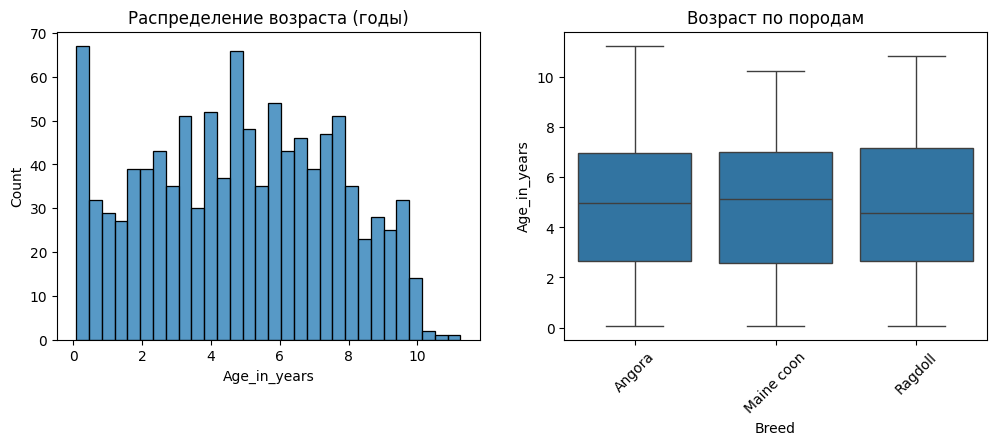

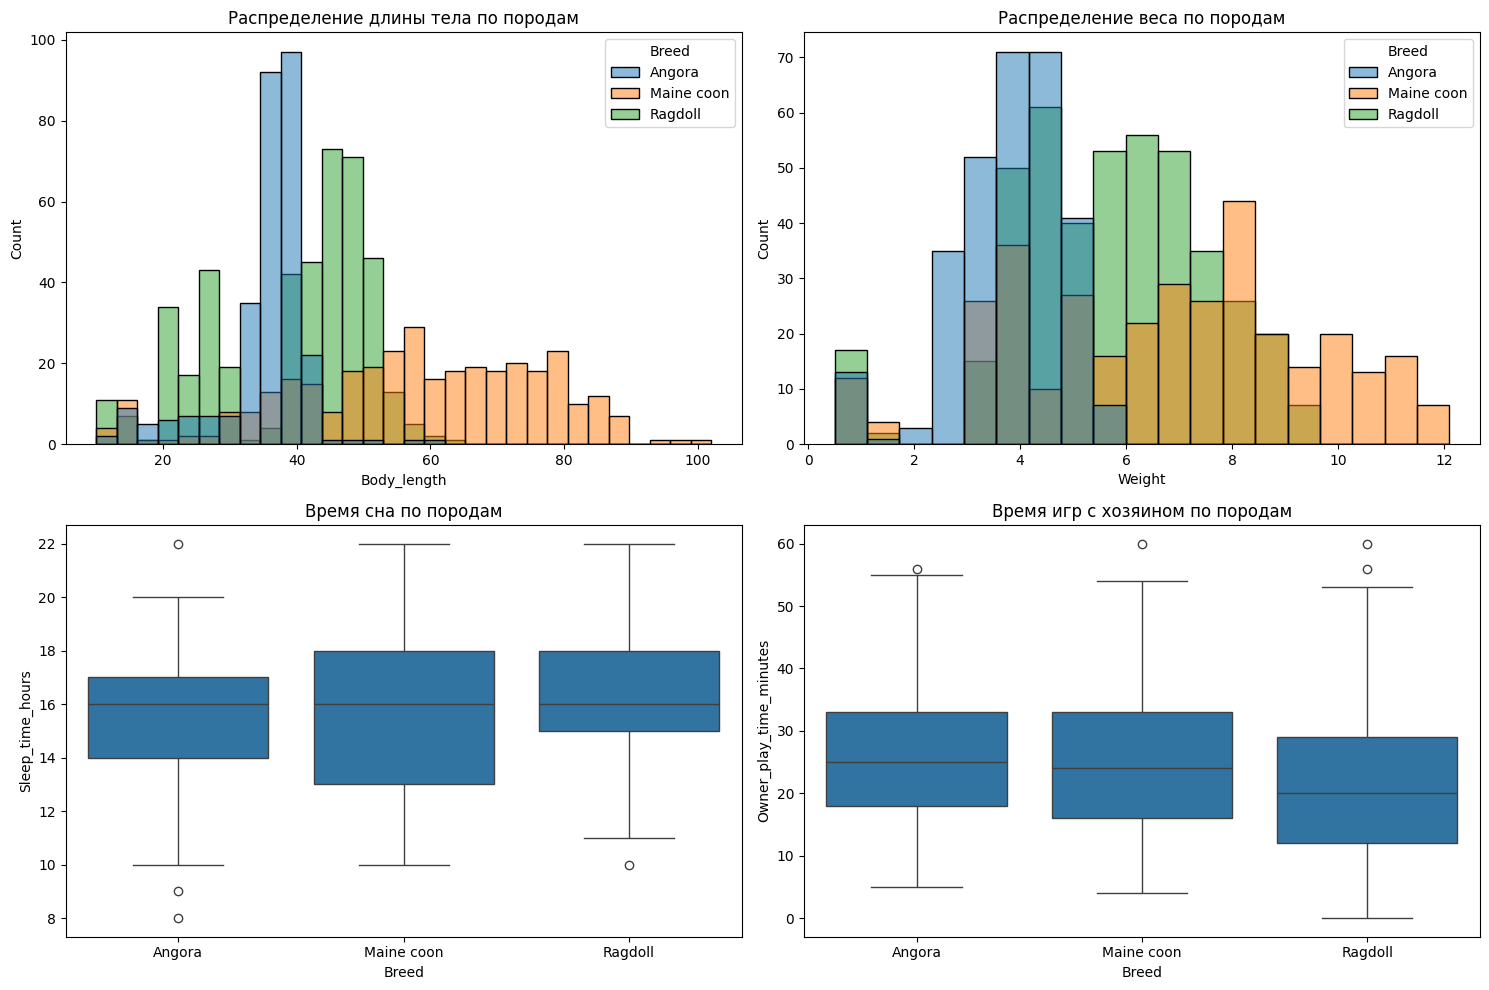

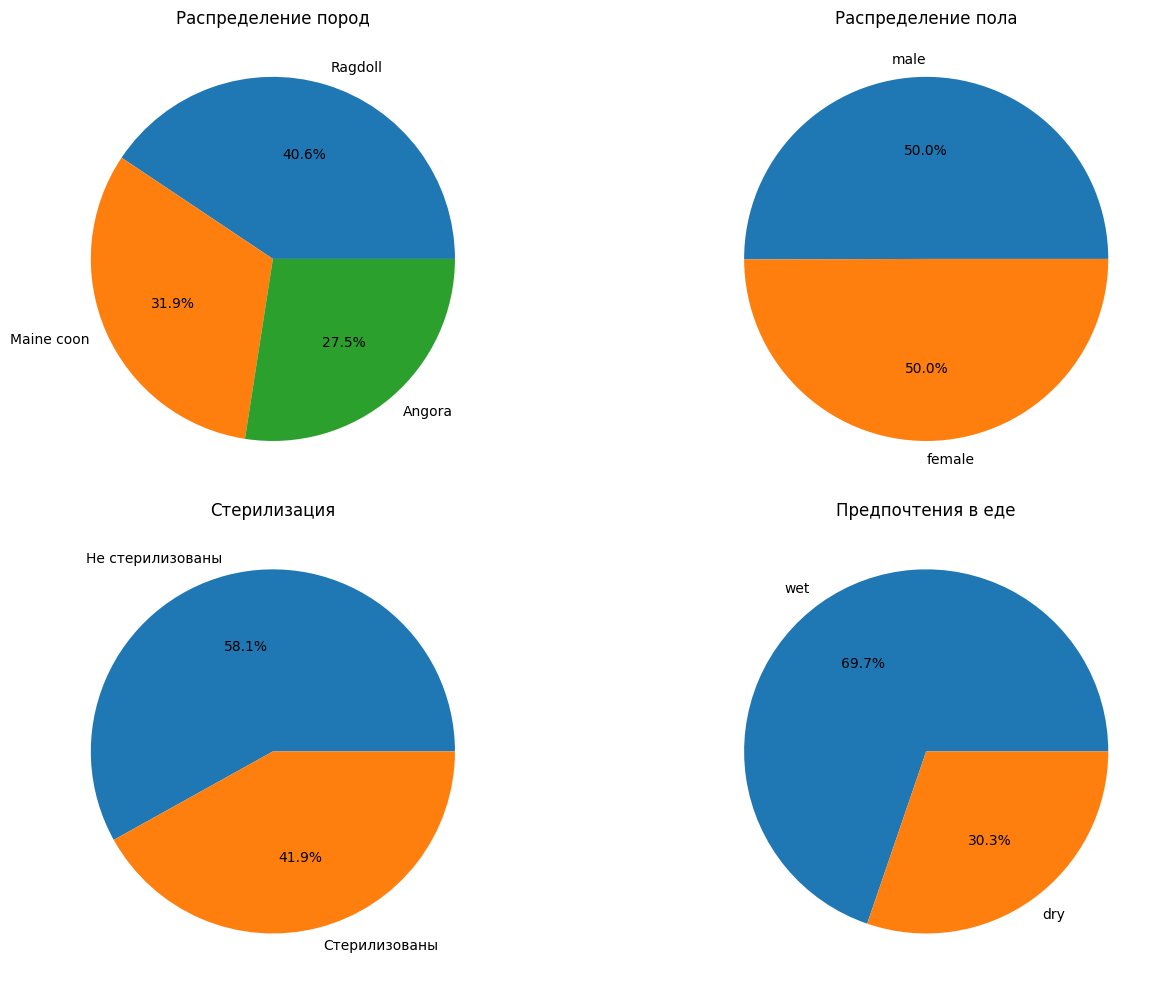

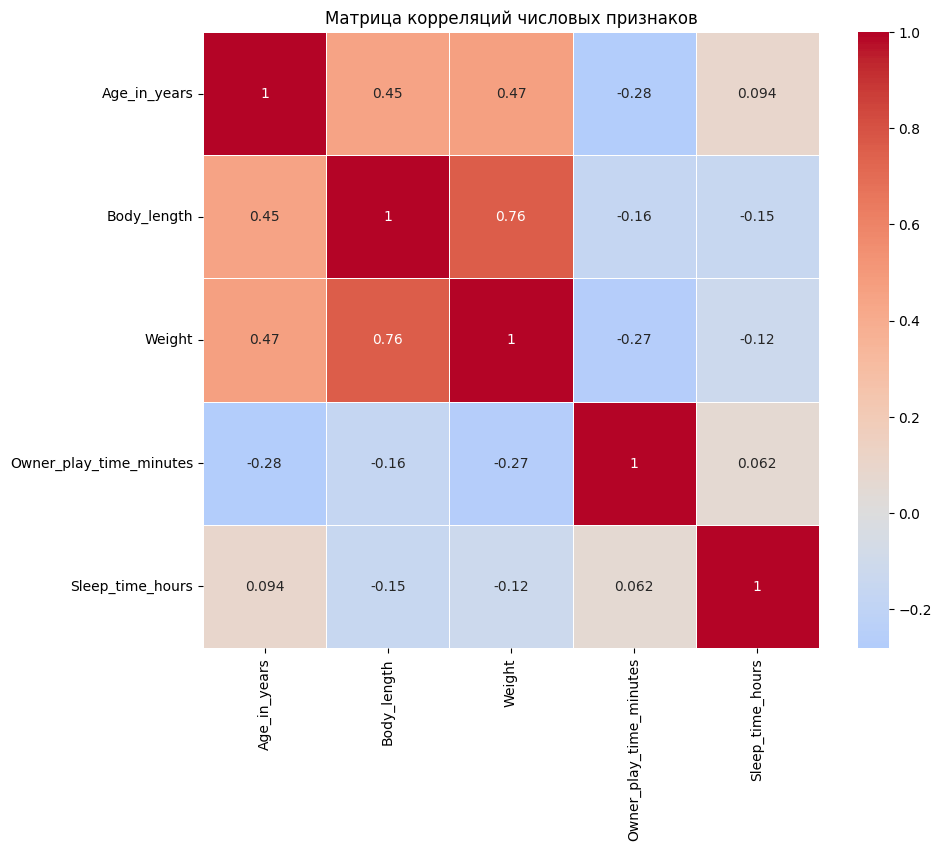

Средние показатели по породам:
            Age_in_years  Body_length    Weight
Breed                                          
Angora          4.857653    35.333333  3.792177
Maine coon      4.901491    57.713450  6.736082
Ragdoll         4.793172    39.085057  5.669172


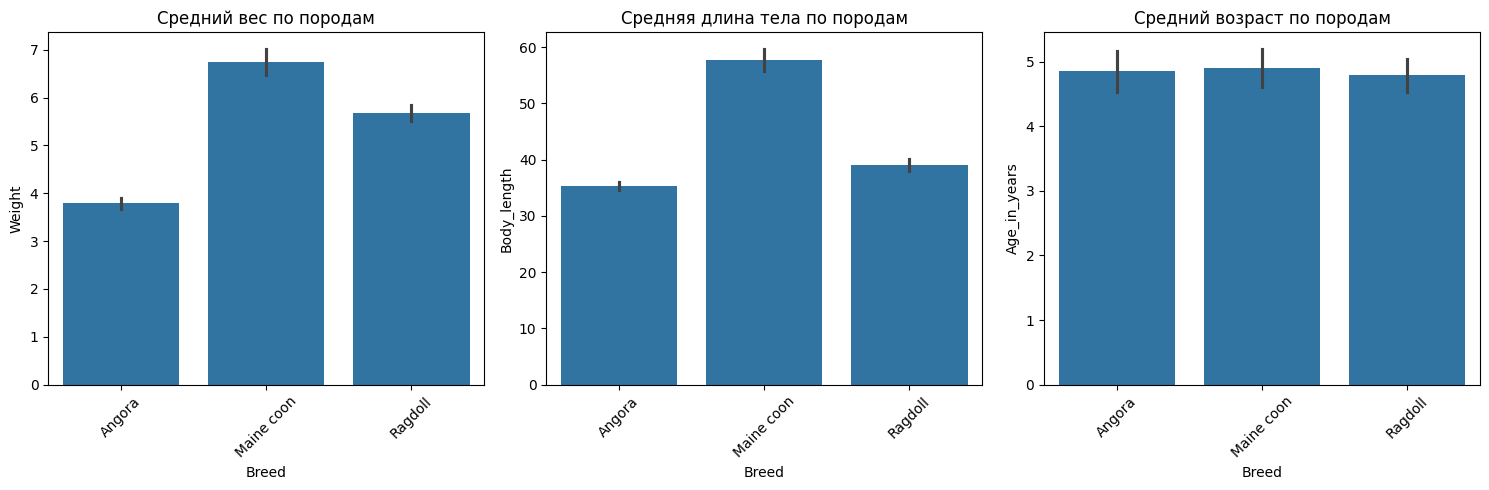

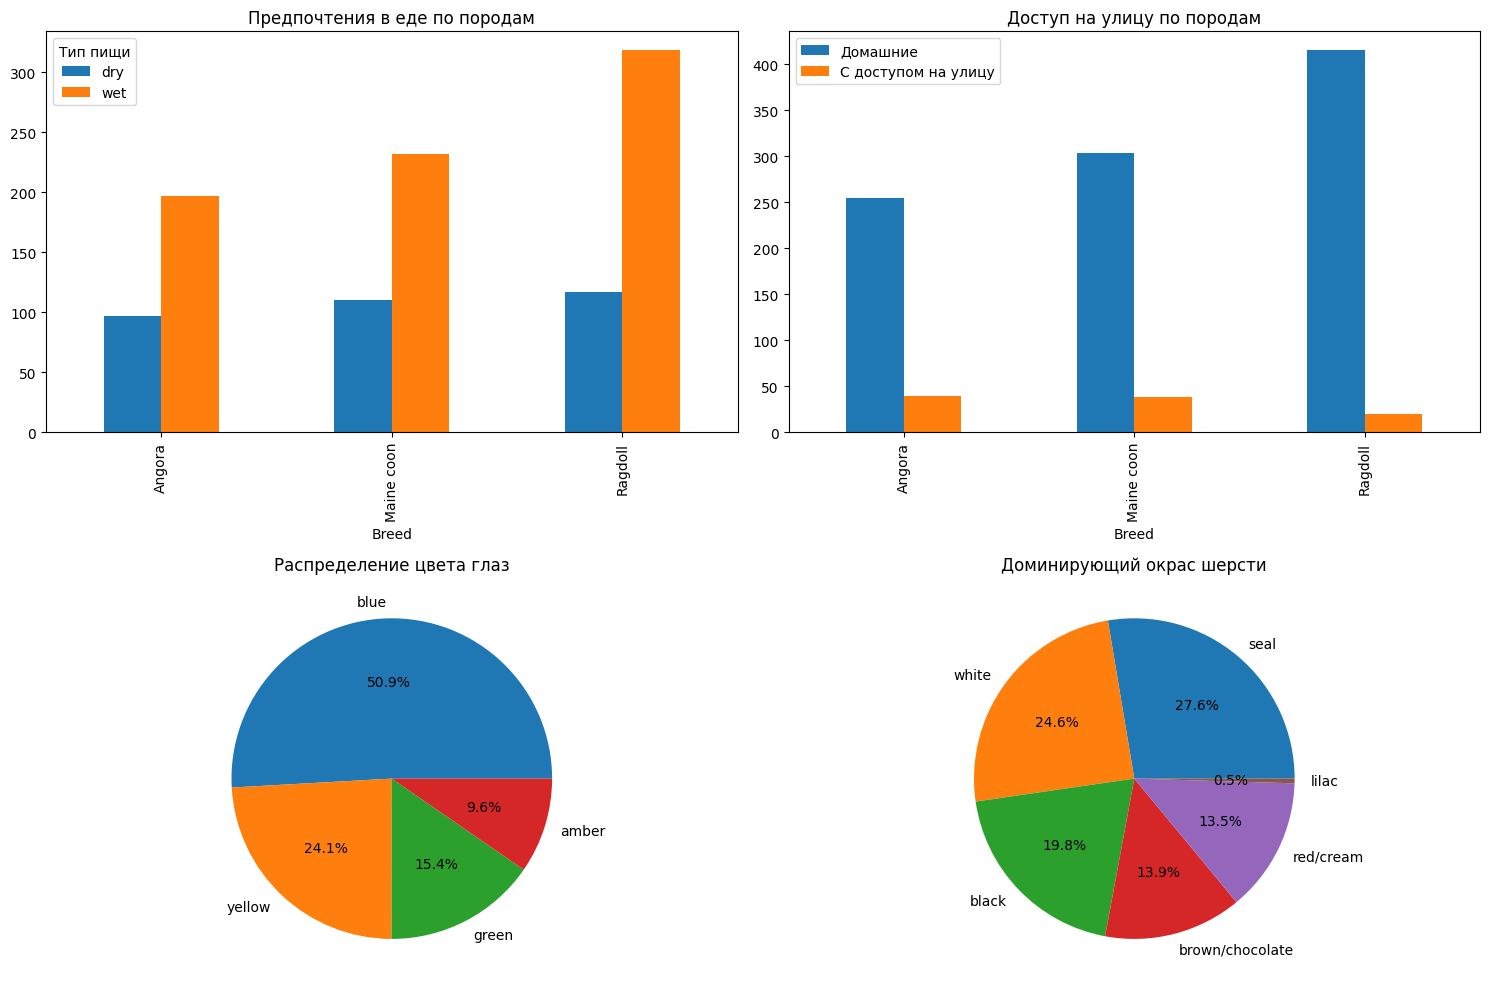

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Основная информация
print("Размер датасета:", df.shape)
print("\nТипы данных:")
print(df.dtypes)
print("\nПропущенные значения:")
print(df.isnull().sum())

# Разделение на категориальные и числовые признаки
categorical_columns = df.select_dtypes(include=['object']).columns
numerical_columns = df.select_dtypes(include=[np.number]).columns

print("\n\nАНАЛИЗ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ")
for col in categorical_columns:
    print(f"\n {col}:")
    value_counts = df[col].value_counts()
    for value, count in value_counts.items():
        percentage = (count / len(df)) * 100
        print(f"  - {value}: {count} ({percentage:.1f}%)")

print("\n\nАНАЛИЗ ЧИСЛОВЫХ ПРИЗНАКОВ")
for col in numerical_columns:
    print(f"\n {col}:")
    print(f" min: {df[col].min():.2f}")
    print(f" max: {df[col].max():.2f}")
    print(f" mean: {df[col].mean():.2f}")
    print(f" median: {df[col].median():.2f}")
    print(f" std: {df[col].std():.2f}")

# График возраста
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(data=df, x='Age_in_years', bins=30)
plt.title('Распределение возраста (годы)')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='Breed', y='Age_in_years')
plt.title('Возраст по породам')
plt.xticks(rotation=45)
plt.show()

# Графики физических параметров и поведения
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

sns.histplot(data=df, x='Body_length', hue='Breed', ax=axes[0,0])
axes[0,0].set_title('Распределение длины тела по породам')

sns.histplot(data=df, x='Weight', hue='Breed', ax=axes[0,1])
axes[0,1].set_title('Распределение веса по породам')

sns.boxplot(data=df, x='Breed', y='Sleep_time_hours', ax=axes[1,0])
axes[1,0].set_title('Время сна по породам')

sns.boxplot(data=df, x='Breed', y='Owner_play_time_minutes', ax=axes[1,1])
axes[1,1].set_title('Время игр с хозяином по породам')

plt.tight_layout()
plt.show()

# Круговые диаграммы
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

breed_counts = df['Breed'].value_counts()
axes[0,0].pie(breed_counts.values, labels=breed_counts.index, autopct='%1.1f%%')
axes[0,0].set_title('Распределение пород')

gender_counts = df['Gender'].value_counts()
axes[0,1].pie(gender_counts.values, labels=gender_counts.index, autopct='%1.1f%%')
axes[0,1].set_title('Распределение пола')

neutered_counts = df['Neutered_or_spayed'].value_counts()
axes[1,0].pie(neutered_counts.values, labels=['Не стерилизованы', 'Стерилизованы'], autopct='%1.1f%%')
axes[1,0].set_title('Стерилизация')

food_counts = df['Preferred_food'].value_counts()
axes[1,1].pie(food_counts.values, labels=food_counts.index, autopct='%1.1f%%')
axes[1,1].set_title('Предпочтения в еде')

plt.tight_layout()
plt.show()

# Корреляционная матрица
numeric_cols = ['Age_in_years', 'Body_length', 'Weight', 'Owner_play_time_minutes', 'Sleep_time_hours']
correlation_matrix = df[numeric_cols].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0, square=True, linewidths=0.5)
plt.title('Матрица корреляций числовых признаков')
plt.show()

# Средние показатели по породам
breed_stats = df.groupby('Breed')[['Age_in_years', 'Body_length', 'Weight']].mean()
print("Средние показатели по породам:")
print(breed_stats)

plt.figure(figsize=(15, 5))

plt.subplot(1, 3, 1)
sns.barplot(data=df, x='Breed', y='Weight')
plt.title('Средний вес по породам')
plt.xticks(rotation=45)

plt.subplot(1, 3, 2)
sns.barplot(data=df, x='Breed', y='Body_length')
plt.title('Средняя длина тела по породам')
plt.xticks(rotation=45)

plt.subplot(1, 3, 3)
sns.barplot(data=df, x='Breed', y='Age_in_years')
plt.title('Средний возраст по породам')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Анализ поведения и внешности
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

pd.crosstab(df['Breed'], df['Preferred_food']).plot(kind='bar', ax=axes[0,0])
axes[0,0].set_title('Предпочтения в еде по породам')
axes[0,0].legend(title='Тип пищи')

pd.crosstab(df['Breed'], df['Allowed_outdoor']).plot(kind='bar', ax=axes[0,1])
axes[0,1].set_title('Доступ на улицу по породам')
axes[0,1].legend(['Домашние', 'С доступом на улицу'])

eye_color_counts = df['Eye_colour'].value_counts().head(8)
axes[1,0].pie(eye_color_counts.values, labels=eye_color_counts.index, autopct='%1.1f%%')
axes[1,0].set_title('Распределение цвета глаз')

fur_color_counts = df['Fur_colour_dominant'].value_counts().head(8)
axes[1,1].pie(fur_color_counts.values, labels=fur_color_counts.index, autopct='%1.1f%%')
axes[1,1].set_title('Доминирующий окрас шерсти')

plt.tight_layout()
plt.show()

In [3]:
from sklearn.preprocessing import OneHotEncoder, StandardScaler
# Задача для кластеризации:
#   Разделить кошек на группы, для формирования схожих рекоммендаций по уходу за ними

# Убираем лишние категории:
#   Age_in_month (т.к. дублирует Age_in_years)
#   Fur_colour_dominant, Fur_pattern, Eye_colour, Country, Latitude, Longitude (т.к. они никак не относятся к образу жизни кошки и не влияют на нее)

# Добавляем категорию Age_group, т.к. разница в годах между 1, 2 и 9,10 одинаковая

def get_age_group(age_in_years):
    if age_in_years < 1:
        return 'Kitten'
    elif age_in_years < 7:
        return 'Adult'
    else:
        return 'Senior'

df['Age_group'] = df['Age_in_years'].apply(get_age_group)

cols = [
    "Breed", "Age_in_years", "Age_group", "Gender", "Neutered_or_spayed",
    "Body_length", "Weight", "Allowed_outdoor", "Preferred_food",
    "Owner_play_time_minutes", "Sleep_time_hours"
]
df = df[cols]

categorical = ["Breed", "Age_group", "Gender", "Neutered_or_spayed", "Allowed_outdoor", "Preferred_food"]
numeric = ["Age_in_years", "Body_length", "Weight", "Owner_play_time_minutes", "Sleep_time_hours"]

encoder = OneHotEncoder(drop="first", sparse_output=False)
encoded_cats = encoder.fit_transform(df[categorical])

encoded_df = pd.DataFrame(encoded_cats, columns=encoder.get_feature_names_out(categorical))

full_df = pd.concat([encoded_df, df[numeric].reset_index(drop=True)], axis=1)

scaler = StandardScaler()
scaled_array = scaler.fit_transform(full_df)
scaled_df = pd.DataFrame(scaled_array, columns=full_df.columns)

Автоматический порог аномалии: -0.0908
Найдено аномалий: 54 из 1071 (5.04%)


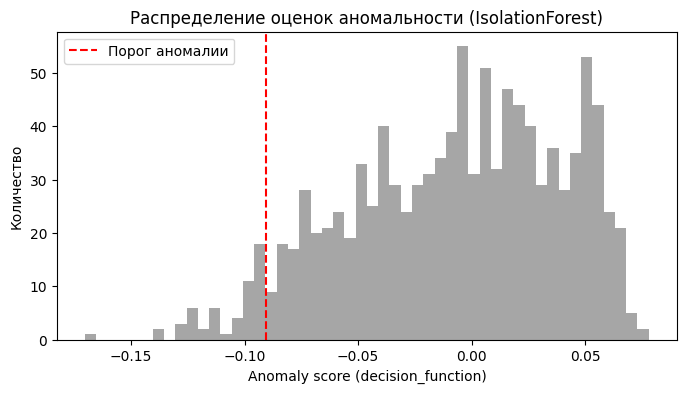

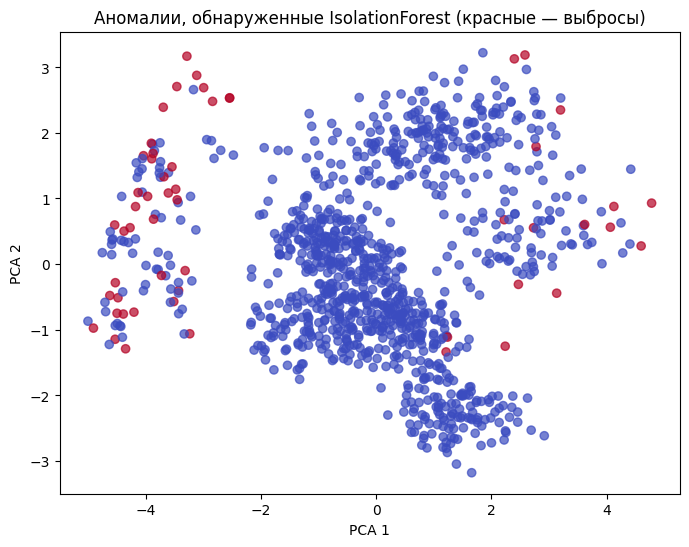

In [4]:
from sklearn.ensemble import IsolationForest
from sklearn.decomposition import PCA
import numpy as np
import matplotlib.pyplot as plt

# Обучение IsolationForest
iso = IsolationForest(random_state=42)
iso.fit(scaled_df)

# Оценка аномальности
scores = iso.decision_function(scaled_df)

# Автоматический порог
threshold = np.percentile(scores, 5)  # нижние 5% считаем аномальными
anomaly_labels = (scores < threshold).astype(int)

# Отчёт
n_anomalies = anomaly_labels.sum()
n_total = len(anomaly_labels)

print(f"Автоматический порог аномалии: {threshold:.4f}")
print(f"Найдено аномалий: {n_anomalies} из {n_total} ({n_anomalies / n_total:.2%})")

# Визуализация распределения
plt.figure(figsize=(8, 4))
plt.hist(scores, bins=50, color='gray', alpha=0.7)
plt.axvline(threshold, color='red', linestyle='--', label='Порог аномалии')
plt.title("Распределение оценок аномальности (IsolationForest)")
plt.xlabel("Anomaly score (decision_function)")
plt.ylabel("Количество")
plt.legend()
plt.show()

# Визуализация PCA
pca = PCA(n_components=2, random_state=42)
pca_result = pca.fit_transform(scaled_df)

plt.figure(figsize=(8,6))
plt.scatter(
    pca_result[:,0],
    pca_result[:,1],
    c=anomaly_labels,
    cmap="coolwarm",
    alpha=0.7
)
plt.title("Аномалии, обнаруженные IsolationForest (красные — выбросы)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.show()


ОЦЕНКА КАЧЕСТВА КЛАСТЕРИЗАЦИИ:
Число кластеров: 2
  Silhouette Score: 0.165
  Davies-Bouldin Index: 2.024
  Inertia: 11862.7
  Calinski-Harabasz Index: 185.7


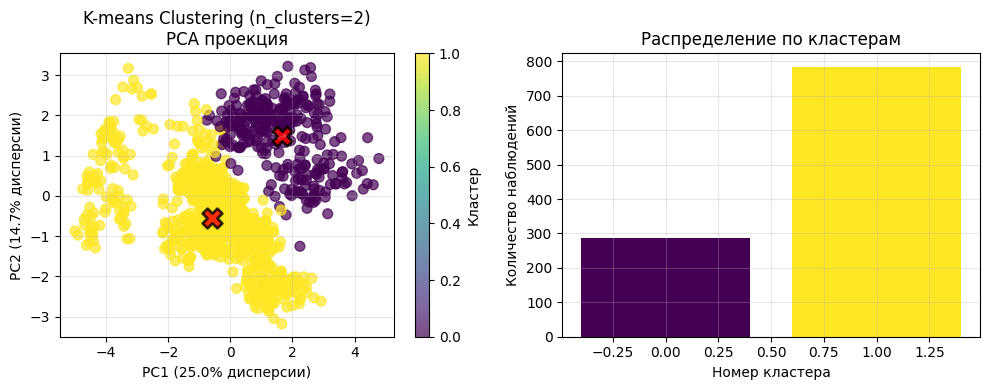

----------------------------------------------------------------------
Число кластеров: 3
  Silhouette Score: 0.203
  Davies-Bouldin Index: 1.782
  Inertia: 9917.1
  Calinski-Harabasz Index: 215.7


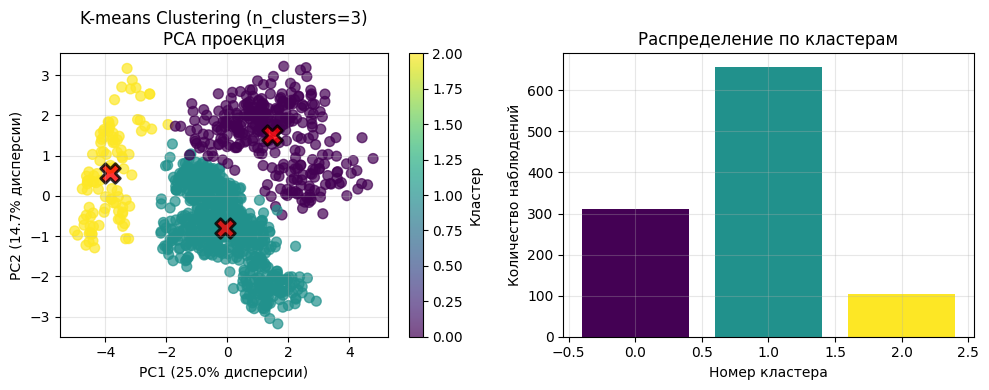

----------------------------------------------------------------------
Число кластеров: 4
  Silhouette Score: 0.206
  Davies-Bouldin Index: 1.658
  Inertia: 8673.9
  Calinski-Harabasz Index: 215.2


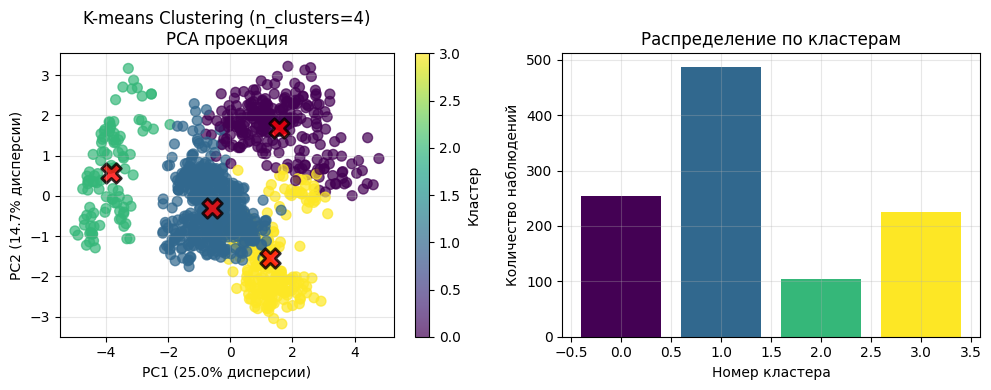

----------------------------------------------------------------------
Число кластеров: 5
  Silhouette Score: 0.176
  Davies-Bouldin Index: 1.793
  Inertia: 8005.3
  Calinski-Harabasz Index: 197.0


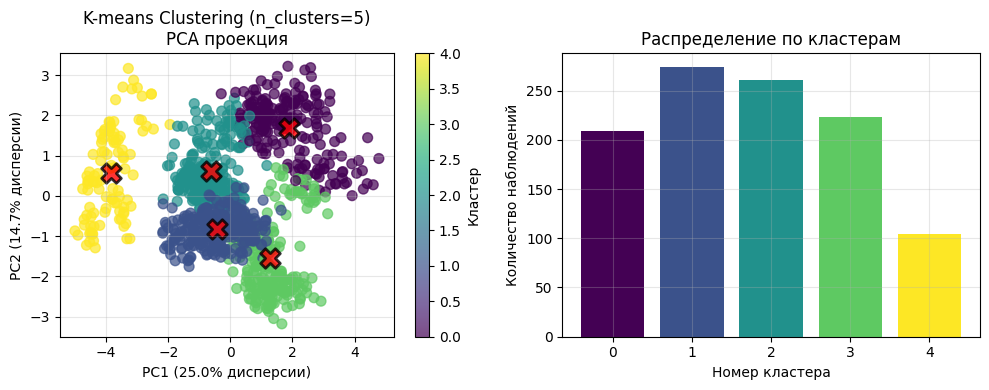

----------------------------------------------------------------------
Число кластеров: 6
  Silhouette Score: 0.182
  Davies-Bouldin Index: 1.913
  Inertia: 7595.9
  Calinski-Harabasz Index: 177.4


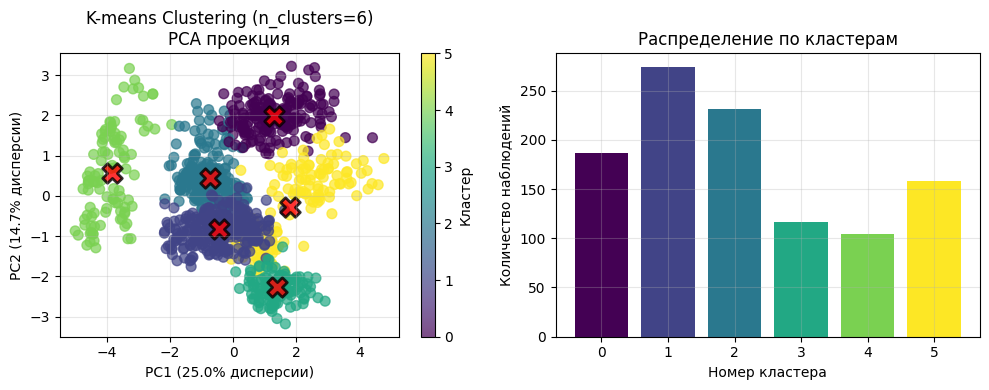

----------------------------------------------------------------------
Число кластеров: 7
  Silhouette Score: 0.194
  Davies-Bouldin Index: 1.806
  Inertia: 7156.8
  Calinski-Harabasz Index: 167.7


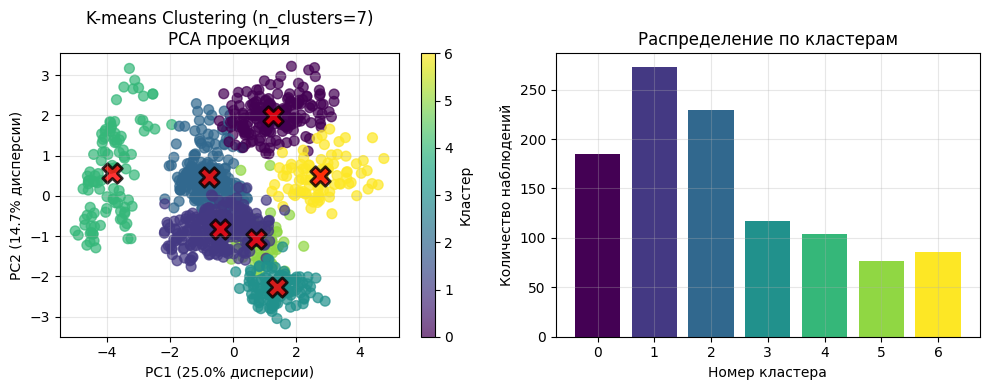

----------------------------------------------------------------------
Число кластеров: 8
  Silhouette Score: 0.191
  Davies-Bouldin Index: 1.592
  Inertia: 6502.0
  Calinski-Harabasz Index: 173.3


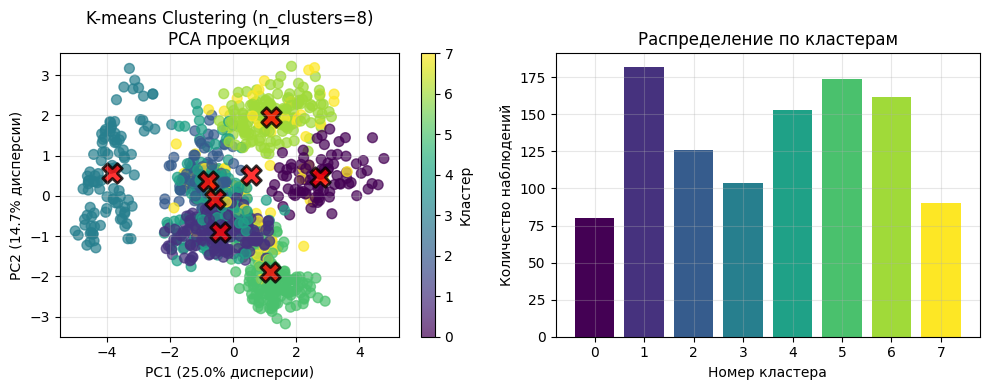

----------------------------------------------------------------------
Число кластеров: 9
  Silhouette Score: 0.193
  Davies-Bouldin Index: 1.595
  Inertia: 6229.6
  Calinski-Harabasz Index: 163.9


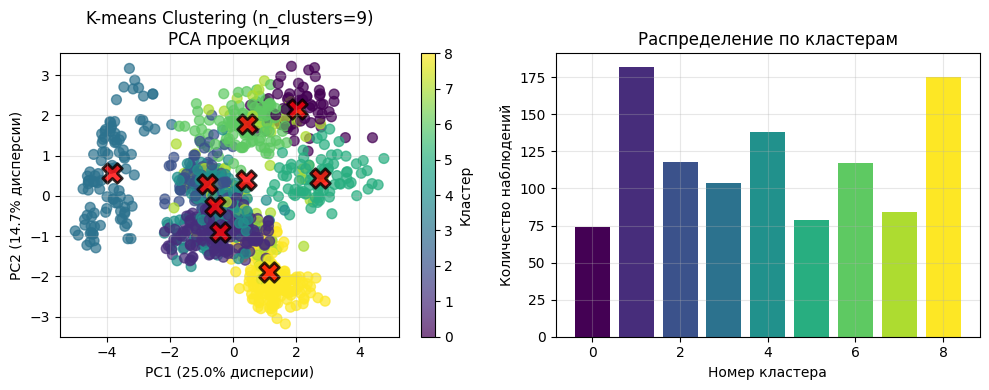

----------------------------------------------------------------------


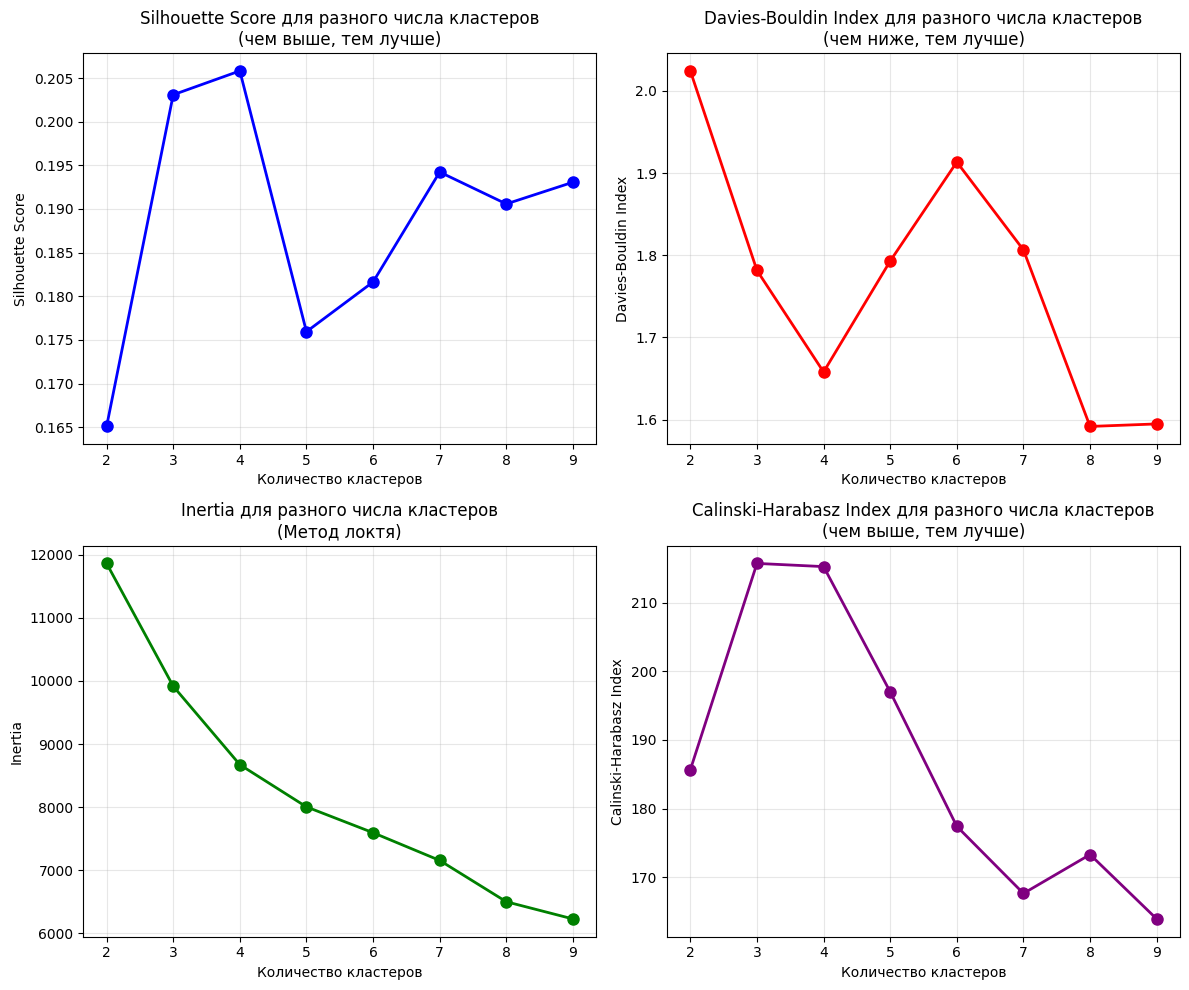


АНАЛИЗ РЕЗУЛЬТАТОВ:
Лучшее число кластеров по Silhouette Score: 4 (score: 0.206)
Лучшее число кластеров по Davies-Bouldin Index: 8 (score: 1.592)
Лучшее число кластеров по Calinski-Harabasz Index: 3 (score: 215.7)

Рекомендуемое число кластеров: 4

Размеры кластеров:
Кластер 0: 254 кошек (23.7%)
Кластер 1: 487 кошек (45.5%)
Кластер 2: 104 кошек (9.7%)
Кластер 3: 226 кошек (21.1%)


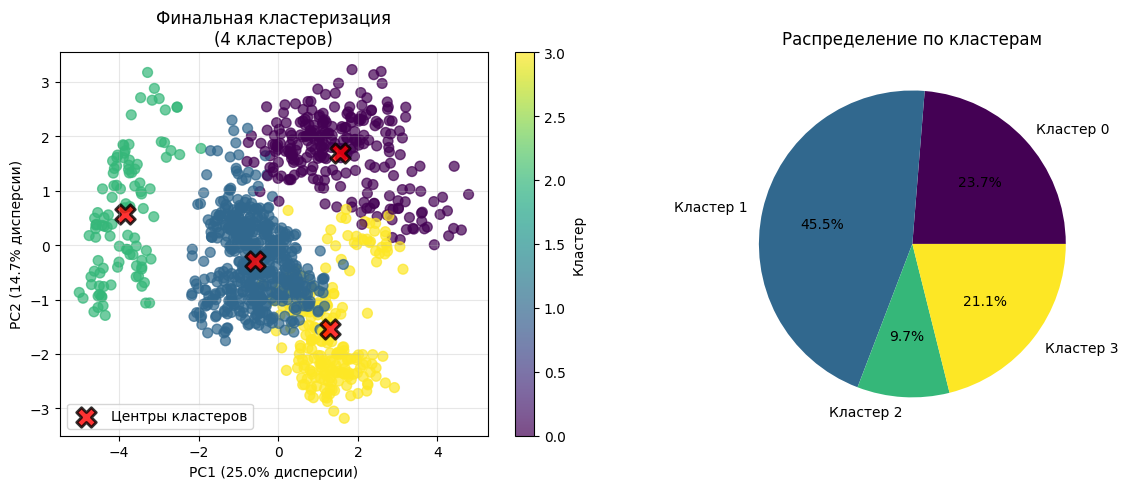


Данные разделены на 4 кластеров.
ПРОФИЛИ КЛАСТЕРОВ:
         Age_in_years  Weight  Body_length  Owner_play_time_minutes  \
Cluster                                                               
0                5.19    7.52        64.17                    23.08   
1                3.97    4.92        37.93                    21.83   
2                0.35    2.19        20.39                    35.12   
3                8.42    5.99        45.31                    20.09   

         Sleep_time_hours  Allowed_outdoor  Neutered_or_spayed  Gender  
Cluster                                                                 
0                   14.94              0.0                 0.0     0.0  
1                   15.14              0.0                 0.0     0.0  
2                   17.40              0.0                 0.0     0.0  
3                   17.88              0.0                 0.0     0.0  

РАСПРЕДЕЛЕНИЕ ПОРОД ПО КЛАСТЕРАМ (%):
Breed    Angora  Maine coon  Ragdoll
Cluste

In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import (silhouette_score, davies_bouldin_score, calinski_harabasz_score)

# Списки для хранения значений метрик
silhouette_scores = []
davies_bouldin_scores = []
inertia_scores = []
calinski_harabasz_scores = []

print("ОЦЕНКА КАЧЕСТВА КЛАСТЕРИЗАЦИИ:")

X = scaled_df

# Проверка качества кластеризации для разного числа кластеров
for n_clusters in range(2, 10):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    labels = kmeans.fit_predict(X)

    # Оценка метрик
    silhouette_avg = silhouette_score(X, labels)
    davies_bouldin = davies_bouldin_score(X, labels)
    inertia = kmeans.inertia_
    calinski_harabasz = calinski_harabasz_score(X, labels)

    silhouette_scores.append(silhouette_avg)
    davies_bouldin_scores.append(davies_bouldin)
    inertia_scores.append(inertia)
    calinski_harabasz_scores.append(calinski_harabasz)

    print(f"Число кластеров: {n_clusters}")
    print(f"  Silhouette Score: {silhouette_avg:.3f}")
    print(f"  Davies-Bouldin Index: {davies_bouldin:.3f}")
    print(f"  Inertia: {inertia:.1f}")
    print(f"  Calinski-Harabasz Index: {calinski_harabasz:.1f}")

    # Применяем PCA для уменьшения размерности до 2D для визуализации
    pca = PCA(n_components=2)
    X_pca = pca.fit_transform(X)

    plt.figure(figsize=(10, 4))

    # Визуализация кластеров в PCA-пространстве
    plt.subplot(1, 2, 1)
    scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, s=50, cmap='viridis', alpha=0.7)

    # Центры кластеров в PCA-пространстве
    centers_pca = pca.transform(kmeans.cluster_centers_)
    plt.scatter(centers_pca[:, 0], centers_pca[:, 1], c='red', s=200, alpha=0.8, marker='X', edgecolor='black', linewidth=2)

    plt.colorbar(scatter, label='Кластер')
    plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.1%} дисперсии)')
    plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.1%} дисперсии)')
    plt.title(f'K-means Clustering (n_clusters={n_clusters})\nPCA проекция')
    plt.grid(True, alpha=0.3)

    # Гистограмма распределения по кластерам
    plt.subplot(1, 2, 2)
    unique, counts = np.unique(labels, return_counts=True)
    plt.bar(unique, counts, color=plt.cm.viridis(np.linspace(0, 1, len(unique))))
    plt.xlabel('Номер кластера')
    plt.ylabel('Количество наблюдений')
    plt.title('Распределение по кластерам')
    plt.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()
    print("-" * 70)

# Визуализация изменения метрик
plt.figure(figsize=(12, 10))

# Silhouette Score
plt.subplot(2, 2, 1)
plt.plot(range(2, 10), silhouette_scores, marker='o', linewidth=2, markersize=8, color='blue')
plt.xlabel('Количество кластеров')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score для разного числа кластеров\n(чем выше, тем лучше)')
plt.grid(True, alpha=0.3)

# Davies-Bouldin Index
plt.subplot(2, 2, 2)
plt.plot(range(2, 10), davies_bouldin_scores, marker='o', linewidth=2, markersize=8, color='red')
plt.xlabel('Количество кластеров')
plt.ylabel('Davies-Bouldin Index')
plt.title('Davies-Bouldin Index для разного числа кластеров\n(чем ниже, тем лучше)')
plt.grid(True, alpha=0.3)

# Inertia (метод локтя)
plt.subplot(2, 2, 3)
plt.plot(range(2, 10), inertia_scores, marker='o', linewidth=2, markersize=8, color='green')
plt.xlabel('Количество кластеров')
plt.ylabel('Inertia')
plt.title('Inertia для разного числа кластеров\n(Метод локтя)')
plt.grid(True, alpha=0.3)

# Calinski-Harabasz Index
plt.subplot(2, 2, 4)
plt.plot(range(2, 10), calinski_harabasz_scores, marker='o', linewidth=2, markersize=8, color='purple')
plt.xlabel('Количество кластеров')
plt.ylabel('Calinski-Harabasz Index')
plt.title('Calinski-Harabasz Index для разного числа кластеров\n(чем выше, тем лучше)')
plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# === АНАЛИЗ РЕЗУЛЬТАТОВ ===
print("\nАНАЛИЗ РЕЗУЛЬТАТОВ:")

# Для Silhouette Score - чем выше, тем лучше
best_silhouette_idx = np.argmax(silhouette_scores)
best_silhouette_clusters = best_silhouette_idx + 2
print(f"Лучшее число кластеров по Silhouette Score: {best_silhouette_clusters} (score: {silhouette_scores[best_silhouette_idx]:.3f})")

# Для Davies-Bouldin - чем ниже, тем лучше
best_db_idx = np.argmin(davies_bouldin_scores)
best_db_clusters = best_db_idx + 2
print(f"Лучшее число кластеров по Davies-Bouldin Index: {best_db_clusters} (score: {davies_bouldin_scores[best_db_idx]:.3f})")

# Для Calinski-Harabasz - чем выше, тем лучше
best_ch_idx = np.argmax(calinski_harabasz_scores)
best_ch_clusters = best_ch_idx + 2
print(f"Лучшее число кластеров по Calinski-Harabasz Index: {best_ch_clusters} (score: {calinski_harabasz_scores[best_ch_idx]:.1f})")


recommended_clusters = 4
print(f"\nРекомендуемое число кластеров: {recommended_clusters}")
final_kmeans = KMeans(n_clusters=recommended_clusters, random_state=42)
final_labels = final_kmeans.fit_predict(X)

# Добавляем метки кластеров к исходным данным
df_with_clusters = df.copy()
df_with_clusters['Cluster'] = final_labels

# Анализ размеров кластеров
print("\nРазмеры кластеров:")
cluster_sizes = df_with_clusters['Cluster'].value_counts().sort_index()
for cluster, size in cluster_sizes.items():
    print(f"Кластер {cluster}: {size} кошек ({size/len(df_with_clusters)*100:.1f}%)")

# Визуализация финальной модели
pca_final = PCA(n_components=2)
X_pca_final = pca_final.fit_transform(X)

plt.figure(figsize=(12, 5))

# PCA проекция финальных кластеров
plt.subplot(1, 2, 1)
scatter_final = plt.scatter(X_pca_final[:, 0], X_pca_final[:, 1], c=final_labels, s=50, cmap='viridis', alpha=0.7)
centers_pca_final = pca_final.transform(final_kmeans.cluster_centers_)
plt.scatter(centers_pca_final[:, 0], centers_pca_final[:, 1], c='red', s=200, alpha=0.8, marker='X',
            edgecolor='black', linewidth=2, label='Центры кластеров')
plt.colorbar(scatter_final, label='Кластер')
plt.xlabel(f'PC1 ({pca_final.explained_variance_ratio_[0]:.1%} дисперсии)')
plt.ylabel(f'PC2 ({pca_final.explained_variance_ratio_[1]:.1%} дисперсии)')
plt.title(f'Финальная кластеризация\n({recommended_clusters} кластеров)')
plt.legend()
plt.grid(True, alpha=0.3)

# Круговоя диаграмма распределения кластеров
plt.subplot(1, 2, 2)
plt.pie(cluster_sizes.values, labels=[f'Кластер {i}' for i in cluster_sizes.index],
        autopct='%1.1f%%', colors=plt.cm.viridis(np.linspace(0, 1, len(cluster_sizes))))
plt.title('Распределение по кластерам')

plt.tight_layout()
plt.show()

print(f"\nДанные разделены на {recommended_clusters} кластеров.")

# Анализ характеристик каждого кластера
cluster_profiles = df_with_clusters.groupby('Cluster').agg({
    'Age_in_years': 'mean',
    'Weight': 'mean',
    'Body_length': 'mean',
    'Owner_play_time_minutes': 'mean',
    'Sleep_time_hours': 'mean',
    'Allowed_outdoor': lambda x: (x == 'Yes').mean(),
    'Neutered_or_spayed': lambda x: (x == 'Yes').mean(),
    'Gender': lambda x: (x == 'Male').mean()
}).round(2)

print("ПРОФИЛИ КЛАСТЕРОВ:")
print(cluster_profiles)

# Анализ распределения пород по кластерам
breed_by_cluster = pd.crosstab(df_with_clusters['Cluster'], df_with_clusters['Breed'], normalize='index') * 100
print("\nРАСПРЕДЕЛЕНИЕ ПОРОД ПО КЛАСТЕРАМ (%):")
print(breed_by_cluster.round(1))

# Анализ возрастных групп по кластерам
age_group_by_cluster = pd.crosstab(df_with_clusters['Cluster'], df_with_clusters['Age_group'], normalize='index') * 100
print("\nРАСПРЕДЕЛЕНИЕ ВОЗРАСТНЫХ ГРУПП ПО КЛАСТЕРАМ (%):")
print(age_group_by_cluster.round(1))

Финальная кластеризация...


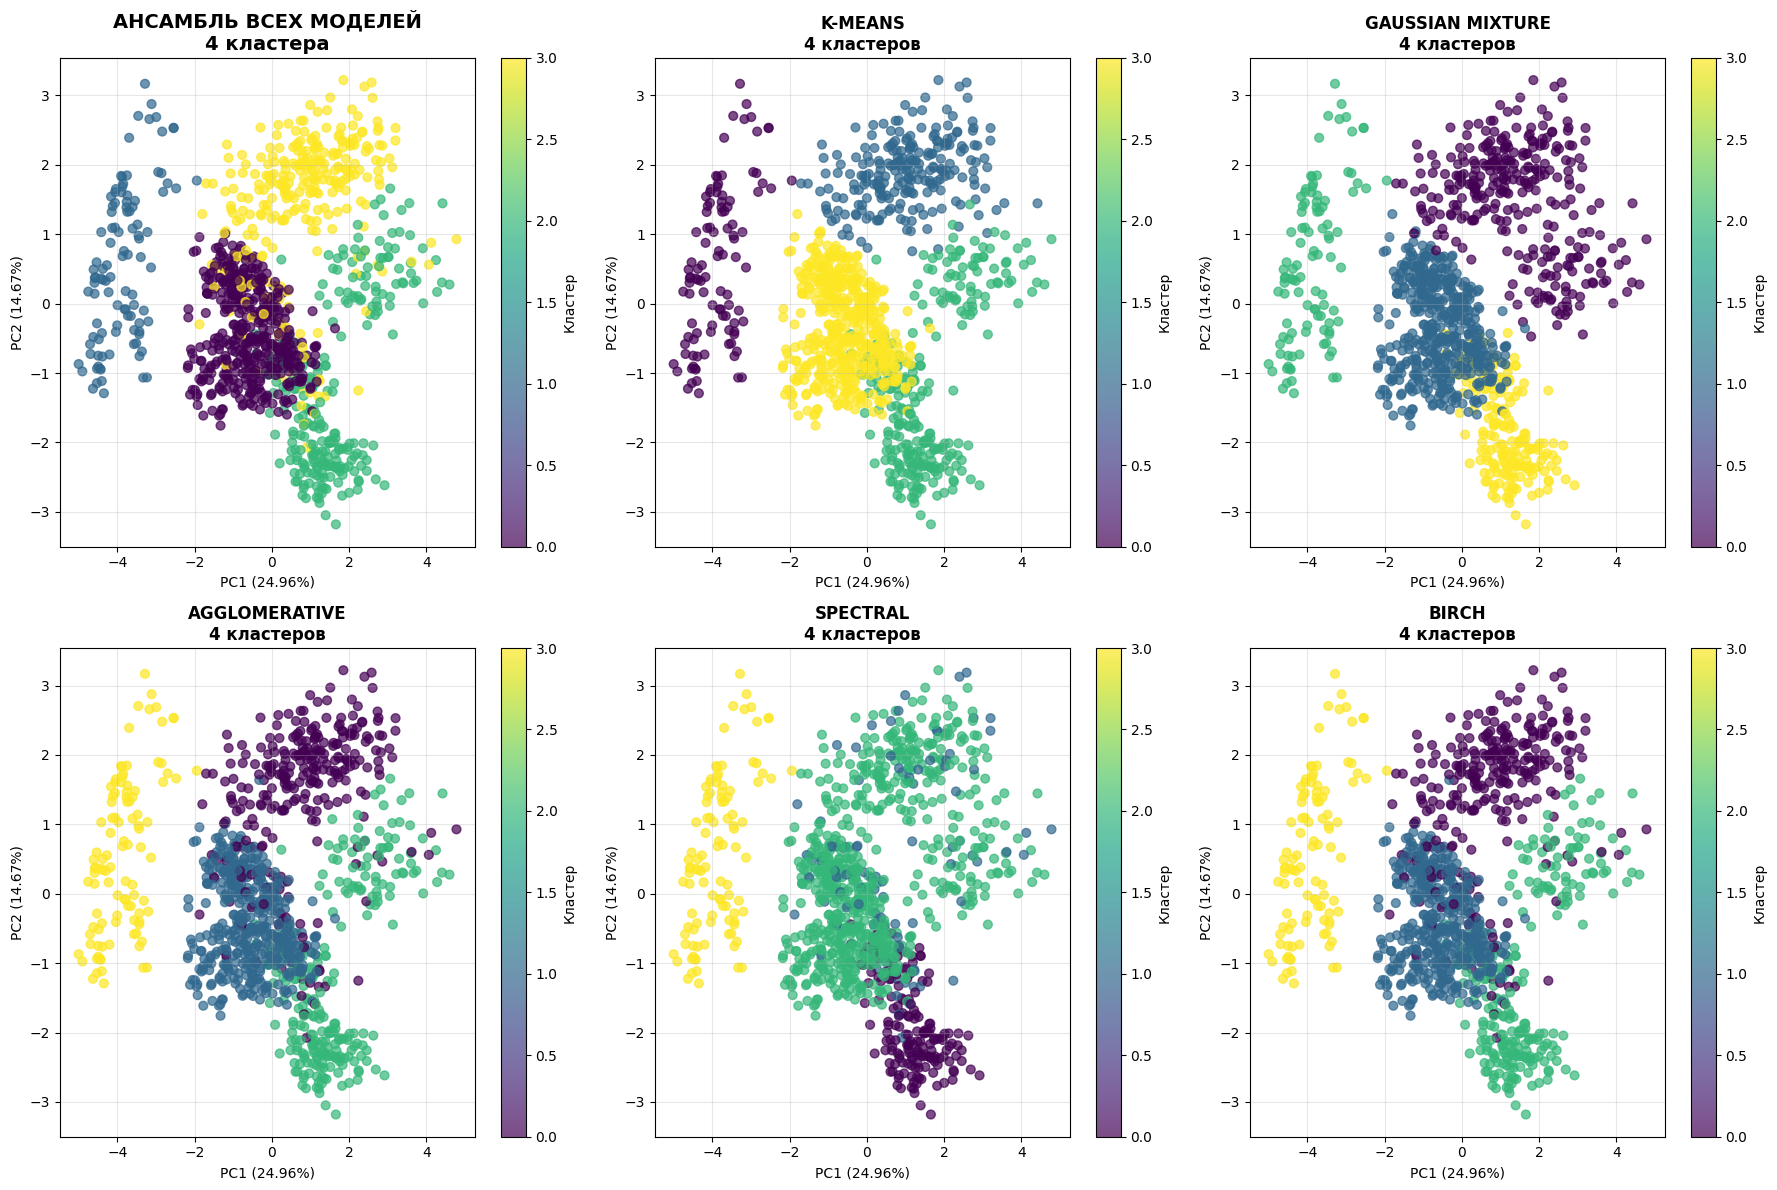


 ОБЩАЯ ИНФОРМАЦИЯ:
Всего кошек: 1071
Количество кластеров: 4
Объясненная дисперсия PCA (2 компоненты): 39.63%

 РАЗМЕРЫ КЛАСТЕРОВ АНСАМБЛЯ:
  Кластер 0: 423 кошек (39.5%)
  Кластер 1: 104 кошек (9.7%)
  Кластер 2: 254 кошек (23.7%)
  Кластер 3: 290 кошек (27.1%)

Кластер 0:
  Средний возраст: 4.1 лет
  Средний вес: 5.0 кг
  Основная порода: Ragdoll (61.2%)
  Возрастная группа: Adult

Кластер 1:
  Средний возраст: 0.3 лет
  Средний вес: 2.2 кг
  Основная порода: Ragdoll (42.3%)
  Возрастная группа: Kitten

Кластер 2:
  Средний возраст: 8.3 лет
  Средний вес: 6.6 кг
  Основная порода: Ragdoll (44.9%)
  Возрастная группа: Senior

Кластер 3:
  Средний возраст: 4.5 лет
  Средний вес: 6.4 кг
  Основная порода: Maine coon (80.7%)
  Возрастная группа: Adult


In [8]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, SpectralClustering, Birch
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from scipy.cluster.hierarchy import linkage, fcluster
from scipy.spatial.distance import pdist
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Функция для ансамблевой кластеризации
def clustering_ensemble_improved(X, n_final_clusters=4, random_state=42):
    base_results = []
    base_models = []

    kmeans = KMeans(n_clusters=n_final_clusters, random_state=random_state, n_init=10)
    kmeans_labels = kmeans.fit_predict(X)
    base_results.append(kmeans_labels)
    base_models.append(('K-Means', kmeans_labels))

    gmm = GaussianMixture(n_components=n_final_clusters, random_state=random_state)
    gmm_labels = gmm.fit_predict(X)
    base_results.append(gmm_labels)
    base_models.append(('Gaussian Mixture', gmm_labels))

    agglo = AgglomerativeClustering(n_clusters=n_final_clusters, metric='euclidean', linkage='ward')
    agglo_labels = agglo.fit_predict(X)
    base_results.append(agglo_labels)
    base_models.append(('Agglomerative', agglo_labels))

    spectral = SpectralClustering(n_clusters=n_final_clusters, random_state=random_state, affinity='rbf', n_init=10)
    spectral_labels = spectral.fit_predict(X)
    base_results.append(spectral_labels)
    base_models.append(('Spectral', spectral_labels))

    birch = Birch(n_clusters=n_final_clusters, threshold=0.3, branching_factor=50)
    birch_labels = birch.fit_predict(X)
    base_results.append(birch_labels)
    base_models.append(('Birch', birch_labels))

    # Строим матрицу совместной встречаемости
    n_samples = X.shape[0]
    coassociation = np.zeros((n_samples, n_samples))

    for labels in base_results:
        unique_labels = np.unique(labels)
        label_mapping = {label: i for i, label in enumerate(unique_labels)}
        normalized_labels = np.array([label_mapping[label] for label in labels])

        for i in range(n_samples):
            for j in range(i, n_samples):
                if normalized_labels[i] == normalized_labels[j]:
                    coassociation[i, j] += 1
                    coassociation[j, i] += 1

    coassociation /= len(base_results)

    # Финальная кластеризация
    print("Финальная кластеризация...")
    distance_matrix = 1 - coassociation
    condensed_dist = pdist(distance_matrix)
    Z = linkage(condensed_dist, method='average')
    final_labels = fcluster(Z, n_final_clusters, criterion='maxclust')

    return final_labels - 1, base_models, coassociation

# Ансамблевая кластеризация
final_labels, base_models, coassociation_matrix = clustering_ensemble_improved(scaled_array, n_final_clusters=4)
df['Ensemble_Cluster'] = final_labels

# PCA для визуализации
pca = PCA(n_components=2)
pca_result = pca.fit_transform(scaled_array)

# DataFrame для визуализации
pca_df = pd.DataFrame({
    'PC1': pca_result[:, 0],
    'PC2': pca_result[:, 1],
    'Ensemble_Cluster': final_labels
})

# Метки от всех моделей в PCA DataFrame
for model_name, labels in base_models:
    pca_df[model_name] = labels

# Визуализация PCA для всех моделей и ансамбля
fig = plt.figure(figsize=(18, 12))

plt.subplot(2, 3, 1)
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Ensemble_Cluster'],
                     cmap='viridis', alpha=0.7, s=40)
plt.colorbar(scatter, label='Кластер')
plt.title('АНСАМБЛЬ ВСЕХ МОДЕЛЕЙ\n4 кластера', fontsize=14, fontweight='bold')
plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
plt.grid(True, alpha=0.3)

models_order = ['K-Means', 'Gaussian Mixture', 'Agglomerative', 'Spectral', 'Birch']
for i, model_name in enumerate(models_order, 2):
    plt.subplot(2, 3, i)

    # Находим соответствующие метки
    labels = None
    for name, lbls in base_models:
        if name == model_name:
            labels = lbls
            break

    if labels is not None:
        unique_clusters = len(np.unique(labels))

        scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=labels, cmap='viridis', alpha=0.7, s=40)
        plt.colorbar(scatter, label='Кластер')
        plt.title(f'{model_name.upper()}\n{unique_clusters} кластеров', fontsize=12, fontweight='bold')
        plt.xlabel(f'PC1 ({pca.explained_variance_ratio_[0]:.2%})')
        plt.ylabel(f'PC2 ({pca.explained_variance_ratio_[1]:.2%})')
        plt.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"\n ОБЩАЯ ИНФОРМАЦИЯ:")
print(f"Всего кошек: {len(df)}")
print(f"Количество кластеров: {len(df['Ensemble_Cluster'].unique())}")
print(f"Объясненная дисперсия PCA (2 компоненты): {pca.explained_variance_ratio_.sum():.2%}")

print(f"\n РАЗМЕРЫ КЛАСТЕРОВ АНСАМБЛЯ:")
cluster_sizes = df['Ensemble_Cluster'].value_counts().sort_index()
for cluster, size in cluster_sizes.items():
    percentage = size / len(df) * 100
    print(f"  Кластер {cluster}: {size} кошек ({percentage:.1f}%)")

for cluster in sorted(df['Ensemble_Cluster'].unique()):
    cluster_data = df[df['Ensemble_Cluster'] == cluster]

    avg_age = cluster_data['Age_in_years'].mean()
    avg_weight = cluster_data['Weight'].mean()
    dominant_breed = cluster_data['Breed'].value_counts().index[0]
    breed_percentage = (cluster_data['Breed'] == dominant_breed).mean() * 100
    dominant_age_group = cluster_data['Age_group'].value_counts().index[0]

    print(f"\nКластер {cluster}:")
    print(f"  Средний возраст: {avg_age:.1f} лет")
    print(f"  Средний вес: {avg_weight:.1f} кг")
    print(f"  Основная порода: {dominant_breed} ({breed_percentage:.1f}%)")
    print(f"  Возрастная группа: {dominant_age_group}")

In [14]:
print(df)

           Breed  Age_in_years Age_group  Gender  Neutered_or_spayed  \
0         Angora          0.25    Kitten  female               False   
1         Angora          0.33    Kitten    male               False   
2         Angora          0.50    Kitten    male               False   
3         Angora          0.50    Kitten  female               False   
4         Angora          0.50    Kitten    male               False   
...          ...           ...       ...     ...                 ...   
1066  Maine coon          0.17    Kitten  female               False   
1067  Maine coon          0.17    Kitten  female               False   
1068  Maine coon          0.17    Kitten    male               False   
1069  Maine coon          0.17    Kitten    male               False   
1070  Maine coon          0.17    Kitten  female               False   

      Body_length  Weight  Allowed_outdoor Preferred_food  \
0              19     2.0            False            wet   
1            


КАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ ПО КЛАСТЕРАМ:


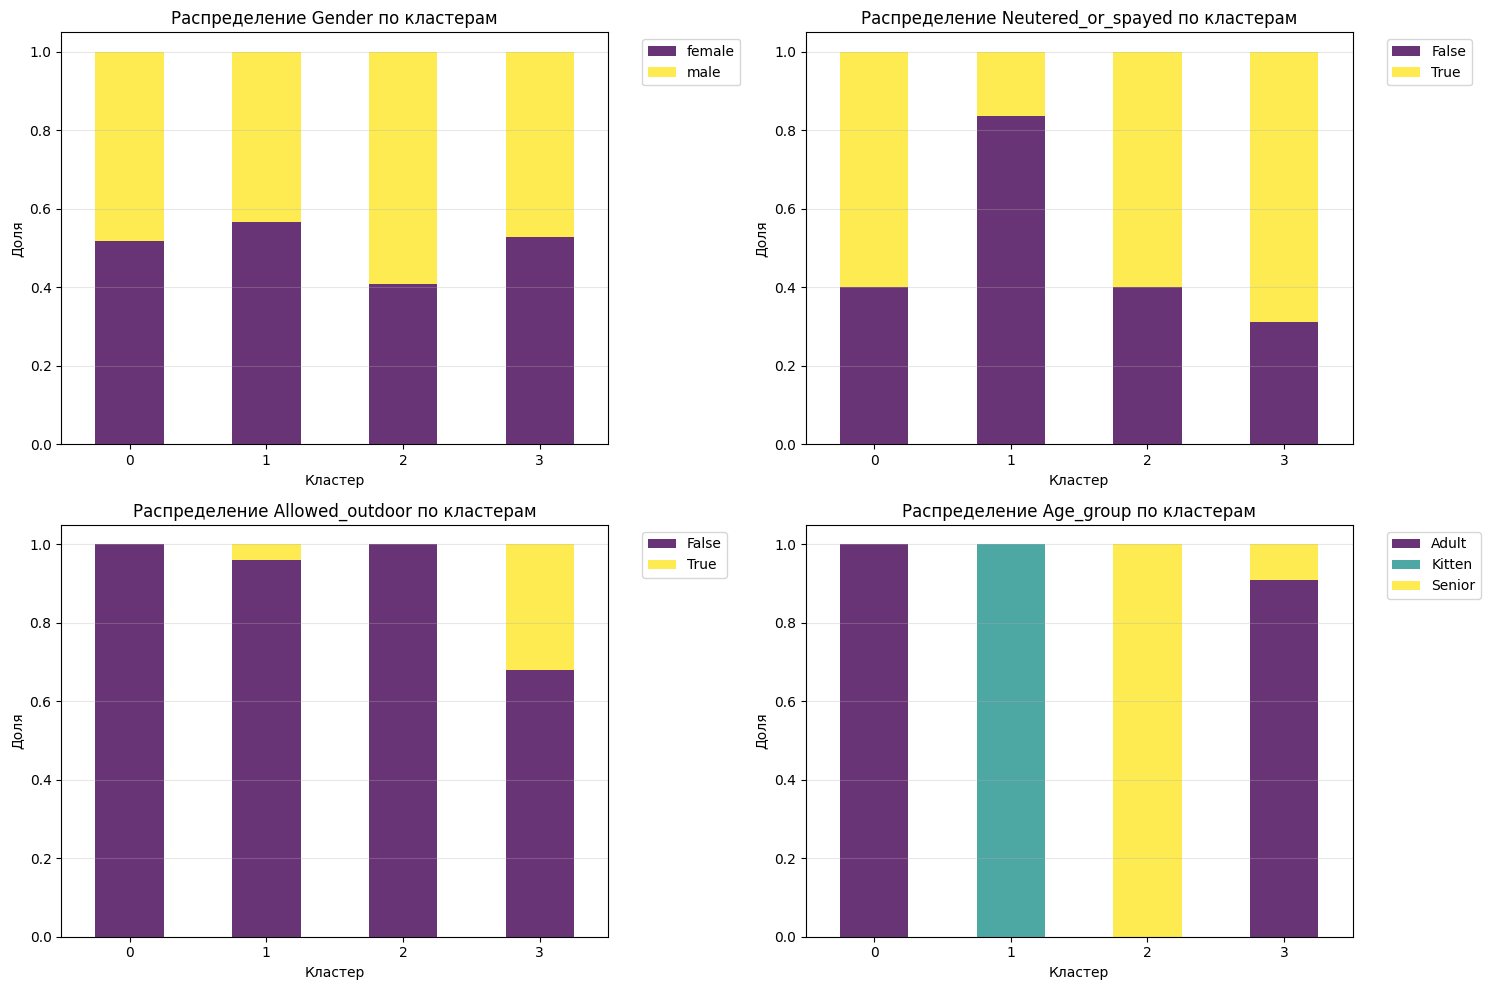


РАСПРЕДЕЛЕНИЕ ПОРОД И ПРЕДПОЧТЕНИЙ В ЕДЕ:


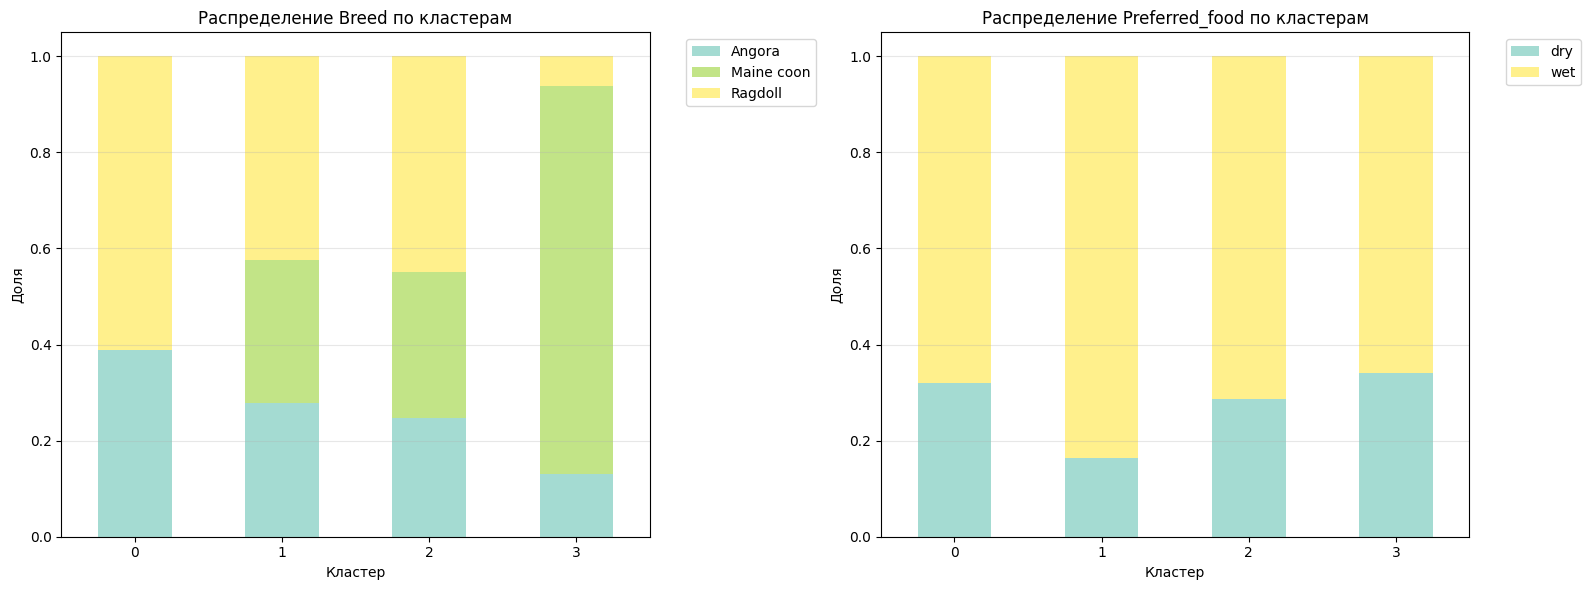


ДЕТАЛЬНОЕ РАСПРЕДЕЛЕНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ ПО КЛАСТЕРАМ:

BREED
Кластер 0: Ragdoll (61.2%); Angora (38.8%)
Кластер 1: Ragdoll (42.3%); Maine coon (29.8%); Angora (27.9%)
Кластер 2: Ragdoll (44.9%); Maine coon (30.3%); Angora (24.8%)
Кластер 3: Maine coon (80.7%); Angora (13.1%); Ragdoll (6.2%)

AGE_GROUP
Кластер 0: Adult (100.0%)
Кластер 1: Kitten (100.0%)
Кластер 2: Senior (100.0%)
Кластер 3: Adult (91.0%); Senior (9.0%)

GENDER
Кластер 0: female (51.8%); male (48.2%)
Кластер 1: female (56.7%); male (43.3%)
Кластер 2: male (59.1%); female (40.9%)
Кластер 3: female (52.8%); male (47.2%)

NEUTERED_OR_SPAYED
Кластер 0: True (59.8%); False (40.2%)
Кластер 1: False (83.7%); True (16.3%)
Кластер 2: True (59.8%); False (40.2%)
Кластер 3: True (69.0%); False (31.0%)

ALLOWED_OUTDOOR
Кластер 0: False (100.0%)
Кластер 1: False (96.2%); True (3.8%)
Кластер 2: False (100.0%)
Кластер 3: False (67.9%); True (32.1%)

PREFERRED_FOOD
Кластер 0: wet (68.1%); dry (31.9%)
Кластер 1: wet (83.7%); d

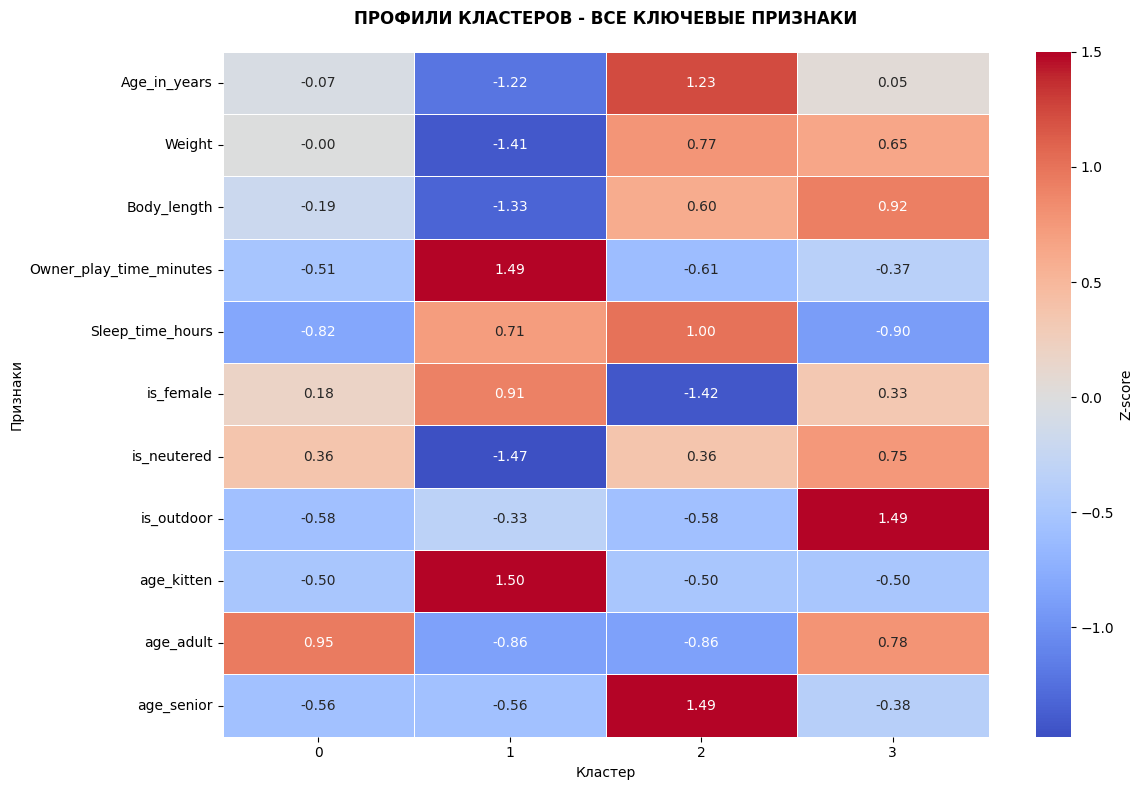

In [20]:
print("\nКАТЕГОРИАЛЬНЫЕ ПРИЗНАКИ ПО КЛАСТЕРАМ:")

key_categorical = ['Gender', 'Neutered_or_spayed', 'Allowed_outdoor', 'Age_group']

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.ravel()

for i, feature in enumerate(key_categorical):
    pivot_data = df_with_clusters.groupby(['Ensemble_Cluster', feature]).size().unstack(fill_value=0)

    # Нормализуем по строкам (кластерам) чтобы получить доли
    pivot_data_normalized = pivot_data.div(pivot_data.sum(axis=1), axis=0)

    # Строим stacked bar chart
    pivot_data_normalized.plot(kind='bar', ax=axes[i], stacked=True,
                              colormap='viridis', alpha=0.8)
    axes[i].set_title(f'Распределение {feature} по кластерам')
    axes[i].set_xlabel('Кластер')
    axes[i].set_ylabel('Доля')
    axes[i].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[i].tick_params(axis='x', rotation=0)
    axes[i].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nРАСПРЕДЕЛЕНИЕ ПОРОД И ПРЕДПОЧТЕНИЙ В ЕДЕ:")

fig, axes = plt.subplots(1, 2, figsize=(16, 6))

for plot_idx, feature in enumerate(['Breed', 'Preferred_food']):

    # Создаем сводную таблицу
    pivot_data = df_with_clusters.groupby(['Ensemble_Cluster', feature]).size().unstack(fill_value=0)

    # Нормализуем
    pivot_data_normalized = pivot_data.div(pivot_data.sum(axis=1), axis=0)

    # Строим график
    pivot_data_normalized.plot(kind='bar', ax=axes[plot_idx], stacked=True,
                              colormap='Set3', alpha=0.8)
    axes[plot_idx].set_title(f'Распределение {feature} по кластерам')
    axes[plot_idx].set_xlabel('Кластер')
    axes[plot_idx].set_ylabel('Доля')
    axes[plot_idx].legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    axes[plot_idx].tick_params(axis='x', rotation=0)
    axes[plot_idx].grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

print("\nДЕТАЛЬНОЕ РАСПРЕДЕЛЕНИЕ КАТЕГОРИАЛЬНЫХ ПРИЗНАКОВ ПО КЛАСТЕРАМ:")

categorical_features = ['Breed', 'Age_group', 'Gender', 'Neutered_or_spayed', 'Allowed_outdoor', 'Preferred_food']

for feature in categorical_features:
    print(f"\n{feature.upper()}")

    # Создаем кросс-таблицу с процентами
    cross_tab = pd.crosstab(df_with_clusters['Ensemble_Cluster'],
                           df_with_clusters[feature],
                           normalize='index') * 100

    # Для каждого кластера показываем топ-3 категории
    for cluster in sorted(df_with_clusters['Ensemble_Cluster'].unique()):
        cluster_data = cross_tab.loc[cluster]
        top_categories = cluster_data.nlargest(3)

        print(f"Кластер {cluster}: ", end="")
        categories_str = []
        for cat, percentage in top_categories.items():
            if percentage > 0:  # Показываем только ненулевые значения
                categories_str.append(f"{cat} ({percentage:.1f}%)")

        if categories_str:
            print("; ".join(categories_str))
        else:
            print("нет данных")

print("\nМАТРИЦА РАСПРЕДЕЛЕНИЯ КЛЮЧЕВЫХ ПРИЗНАКОВ:")

# Создаем бинарные признаки для визуализации в heatmap
binary_features = []
for feature in ['Gender', 'Neutered_or_spayed', 'Allowed_outdoor', 'Age_group']:
    if feature == 'Gender':
        df_with_clusters['is_female'] = (df_with_clusters['Gender'] == 'female').astype(int)
        binary_features.append('is_female')
    elif feature == 'Neutered_or_spayed':
        df_with_clusters['is_neutered'] = (df_with_clusters['Neutered_or_spayed'] == True).astype(int)
        binary_features.append('is_neutered')
    elif feature == 'Allowed_outdoor':
        df_with_clusters['is_outdoor'] = (df_with_clusters['Allowed_outdoor'] == True).astype(int)
        binary_features.append('is_outdoor')
    elif feature == 'Age_group':
        # Создаем бинарные признаки для каждой возрастной группы
        for age_group in df_with_clusters['Age_group'].unique():
            col_name = f'age_{age_group.lower()}'
            df_with_clusters[col_name] = (df_with_clusters['Age_group'] == age_group).astype(int)
            binary_features.append(col_name)

# Добавляем числовые признаки
all_viz_features = ['Age_in_years', 'Weight', 'Body_length', 'Owner_play_time_minutes', 'Sleep_time_hours'] + binary_features

# Агрегируем по кластерам
cluster_means = df_with_clusters.groupby('Ensemble_Cluster')[all_viz_features].mean()

# Нормализуем для тепловой карты
cluster_means_normalized = (cluster_means - cluster_means.mean()) / cluster_means.std()

plt.figure(figsize=(12, 8))
sns.heatmap(cluster_means_normalized.T, annot=True, cmap='coolwarm', center=0,
           fmt='.2f', linewidths=0.5, cbar_kws={'label': 'Z-score'})
plt.title('ПРОФИЛИ КЛАСТЕРОВ - ВСЕ КЛЮЧЕВЫЕ ПРИЗНАКИ', fontweight='bold', pad=20)
plt.xlabel('Кластер')
plt.ylabel('Признаки')
plt.tight_layout()
plt.show()

# Очистка временных столбцов
temp_cols = ['is_female', 'is_neutered', 'is_outdoor'] + [col for col in df_with_clusters.columns if col.startswith('age_')]
df_with_clusters.drop(columns=temp_cols, inplace=True, errors='ignore')